# Comparação de Classificadores

Classificadores a serem testados: KNN (k: 9), SVM (kernel: linear), SVM (kernel: RBF), Decision Tree (profundidade máxima: 10, critério: entropia), Random Forest (profundidade máxima: 10, número de estimadores: 100) e Adaboost.

Métricas a serem computadas: accuracy, precision, recall, F1, AUC da ROC.

Links úteis:

http://scikit-learn.org/stable/modules/classes.html

http://scikit-learn.org/stable/modules/model_evaluation.html


####################################
####################################
Dataset moons
X_train (60, 2)
X_test (40, 2)
y_train (60,)
y_test (40,)
------------------------------------
     Classifier KNN
------------------------------------
     Classifier Decision Tree
------------------------------------
     Classifier Random Forest
------------------------------------
     Classifier SVM Linear
------------------------------------
     Classifier SVM RBF
------------------------------------
     Classifier AdaBoost

####################################
####################################
Dataset circles
X_train (60, 2)
X_test (40, 2)
y_train (60,)
y_test (40,)
------------------------------------
     Classifier KNN
------------------------------------
     Classifier Decision Tree
------------------------------------
     Classifier Random Forest
------------------------------------
     Classifier SVM Linear


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------------------------------------
     Classifier SVM RBF
------------------------------------
     Classifier AdaBoost

####################################
####################################
Dataset iris
X_train (60, 2)
X_test (40, 2)
y_train (60,)
y_test (40,)
------------------------------------
     Classifier KNN
------------------------------------
     Classifier Decision Tree
------------------------------------
     Classifier Random Forest
------------------------------------
     Classifier SVM Linear
------------------------------------
     Classifier SVM RBF
------------------------------------
     Classifier AdaBoost


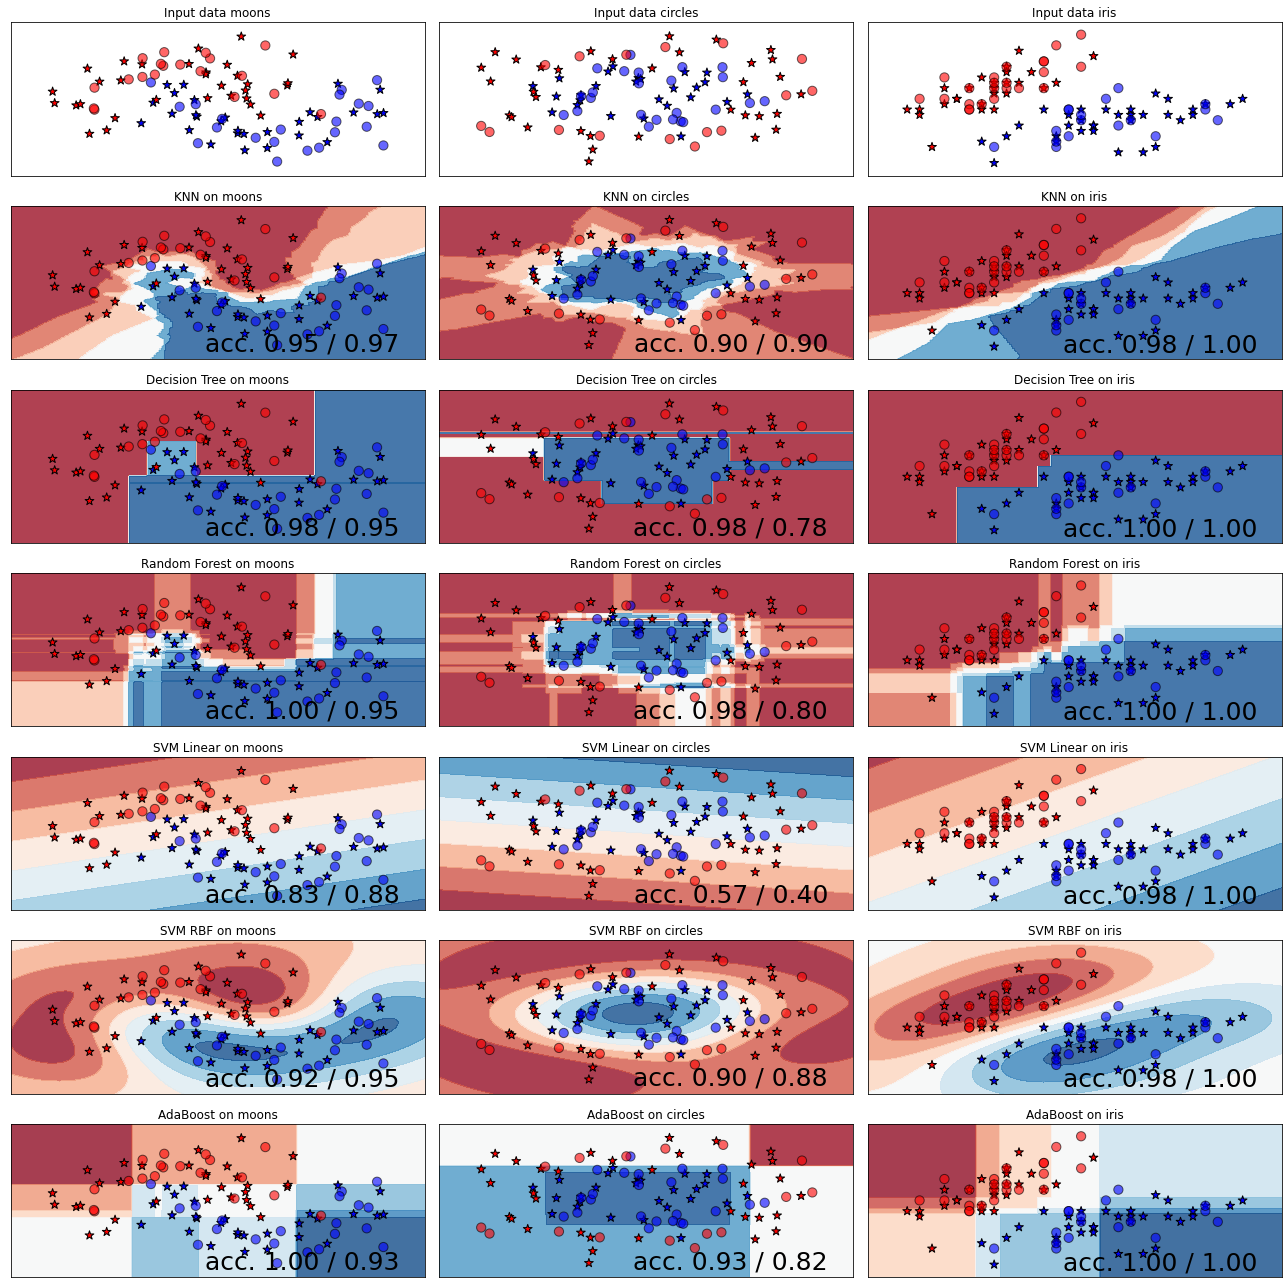

In [9]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics

%matplotlib inline

h = .02  # Step size in the mesh for plotting.

# Classifier names.
names = [
    'KNN',
    'Decision Tree',
    'Random Forest',
    'SVM Linear',
    'SVM RBF',
    'AdaBoost',
]

# Presetting classifiers.
classifiers = [
    KNeighborsClassifier(n_neighbors=5),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(n_estimators=10),
    SVC(kernel='linear'),
    SVC(kernel='rbf'),
    AdaBoostClassifier(n_estimators=10),
]

# Presetting datasets.
iris_indices = np.where(load_iris()['target'] < 2)[0]
dataset_names = ['moons', 'circles', 'iris']
datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    (load_iris()['data'][iris_indices, 0:2], load_iris()['target'][iris_indices])
]

# Presetting matplotlib figure.
fig, ax = plt.subplots(len(classifiers) + 1, len(datasets), figsize=(18, 18))
marker_size = 85
text_size = 25
i = 1

# Iterate over datasets.
for ds_cnt, ds in enumerate(datasets):
    
    ds_name = dataset_names[ds_cnt]
    
    # Split into training and test part.
    X, y = ds # X -> features, y -> labels.
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42) # Splitting.

    # Printing dataset shapes.
    print('')
    print('####################################')
    print('####################################')
    print('Dataset', ds_name)
    print('X_train', X_train.shape)
    print('X_test', X_test.shape)
    print('y_train', y_train.shape)
    print('y_test', y_test.shape)
    
    # Finding boundaries.
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Just plot the dataset first.
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    # ax[0, ds_cnt] = plt.subplot(len(classifiers) + 1, len(datasets), i)
    ax[0, ds_cnt].set_title('Input data ' + ds_name)
    
    # Plot the training points;
    ax[0, ds_cnt].scatter(X_train[:, 0], X_train[:, 1], marker_size, c=y_train, cmap=cm_bright, edgecolors='k', marker='*')
    # and testing points.
    ax[0, ds_cnt].scatter(X_test[:, 0], X_test[:, 1], marker_size, c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k', marker='o')
    
    ax[0, ds_cnt].set_xlim(xx.min(), xx.max())
    ax[0, ds_cnt].set_ylim(yy.min(), yy.max())
    ax[0, ds_cnt].set_xticks(())
    ax[0, ds_cnt].set_yticks(())
    i += 1

    # Iterate over classifiers.
    for clf_cnt, (clf_name, clf) in enumerate(zip(names, classifiers)):
        
        print('------------------------------------')
        print('    ', 'Classifier', clf_name)
        
        # Adding subplot.
        # ax[0, ds_cnt] = plt.subplot(len(classifiers) + 1, len(datasets), i)
        
        # Fitting classifier to train data.
        clf.fit(X_train, y_train)
        
        # Obtaining class prediction for training data.
        y_pred_train = clf.predict(X_train)
        
        # Obtaining class prediction for unseen data.
        y_pred_test = clf.predict(X_test)
        
        # Computing error metrics in the training data.
        acc_train = metrics.accuracy_score(y_train, y_pred_train)
        pre_train = metrics.precision_score(y_train, y_pred_train)
        rec_train = metrics.recall_score(y_train, y_pred_train)
        f1_train  = metrics.f1_score(y_train, y_pred_train)
        roc_train = metrics.roc_auc_score(y_train, y_pred_train)
        
        # Computing error metrics in the unseen data.
        acc_test = metrics.accuracy_score(y_test, y_pred_test)
        pre_test = metrics.precision_score(y_test, y_pred_test)
        rec_test = metrics.recall_score(y_test, y_pred_test)
        f1_test  = metrics.f1_score(y_test, y_pred_test)
        roc_test = metrics.roc_auc_score(y_test, y_pred_test)
        
        # Printing error metrics.
        # print('        Accuracy Train: %.4f, Test: %.4f' % (acc_train, acc_test))
        # print('        Precision Train: %.4f, Test: %.4f' % (pre_train, pre_test))
        # print('        Recall Train: %.4f, Test: %.4f' % (rec_train, rec_test))
        # print('        F1 Train: %.4f, Test: %.4f' % (f1_train, f1_test))
        # print('        AUC/ROC Train: %.4f, Test: %.4f' % (roc_train, roc_test))

        # Plot the decision boundary.
        if hasattr(clf, 'decision_function'):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot.
        Z = Z.reshape(xx.shape)
        ax[clf_cnt + 1, ds_cnt].contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points;
        ax[clf_cnt + 1, ds_cnt].scatter(X_train[:, 0], X_train[:, 1], marker_size, c=y_train, cmap=cm_bright, edgecolors='k', marker='*')
        # and testing points.
        ax[clf_cnt + 1, ds_cnt].scatter(X_test[:, 0], X_test[:, 1], marker_size, c=y_test, cmap=cm_bright, edgecolors='k', marker='o', alpha=0.6)

        ax[clf_cnt + 1, ds_cnt].set_xlim(xx.min(), xx.max())
        ax[clf_cnt + 1, ds_cnt].set_ylim(yy.min(), yy.max())
        ax[clf_cnt + 1, ds_cnt].set_xticks(())
        ax[clf_cnt + 1, ds_cnt].set_yticks(())
        ax[clf_cnt + 1, ds_cnt].set_title(clf_name + ' on ' + ds_name)
        
        # Printing error metrics.
        ax[clf_cnt + 1, ds_cnt].text(xx.max() - .3, yy.min() + .3,  ('acc. %.2f / %.2f' % (acc_train, acc_test)).lstrip('0'), size=text_size, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()